68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5213 - loss: 0.7427 - val_accuracy: 0.6740 - val_loss: 0.6440
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6385 - loss: 0.6319 - val_accuracy: 0.6650 - val_loss: 0.5990
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7193 - loss: 0.5627 - val_accuracy: 0.6660 - val_loss: 0.6149
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7451 - loss: 0.5191 - val_accuracy: 0.7030 - val_loss: 0.5963
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7835 - loss: 0.4502 - val_accuracy: 0.7410 - val_loss: 0.5644


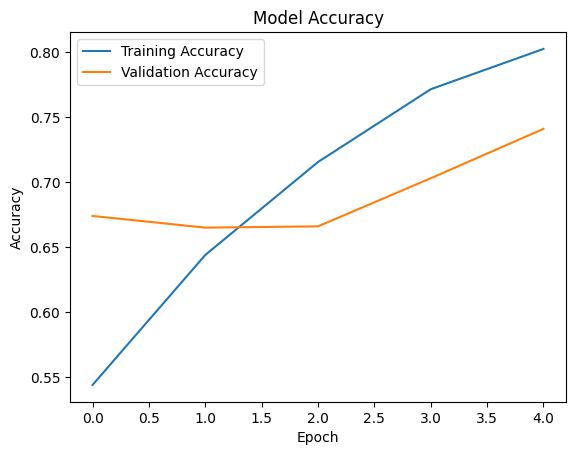

In [ ]:
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt

# تحميل بيانات cats vs dogs
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=False)

# فك الضغط
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall('/tmp/')

# المسارات إلى مجلدات التدريب والاختبار
train_dir = '/tmp/cats_and_dogs_filtered/train'
val_dir = '/tmp/cats_and_dogs_filtered/validation'

# تحميل البيانات إلى مجموعات بيانات TensorFlow
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(150, 150),
    batch_size=32
)

# بناء نموذج CNN
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# ترجمة النموذج
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# تدريب النموذج
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

# رسم نتائج التدريب
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


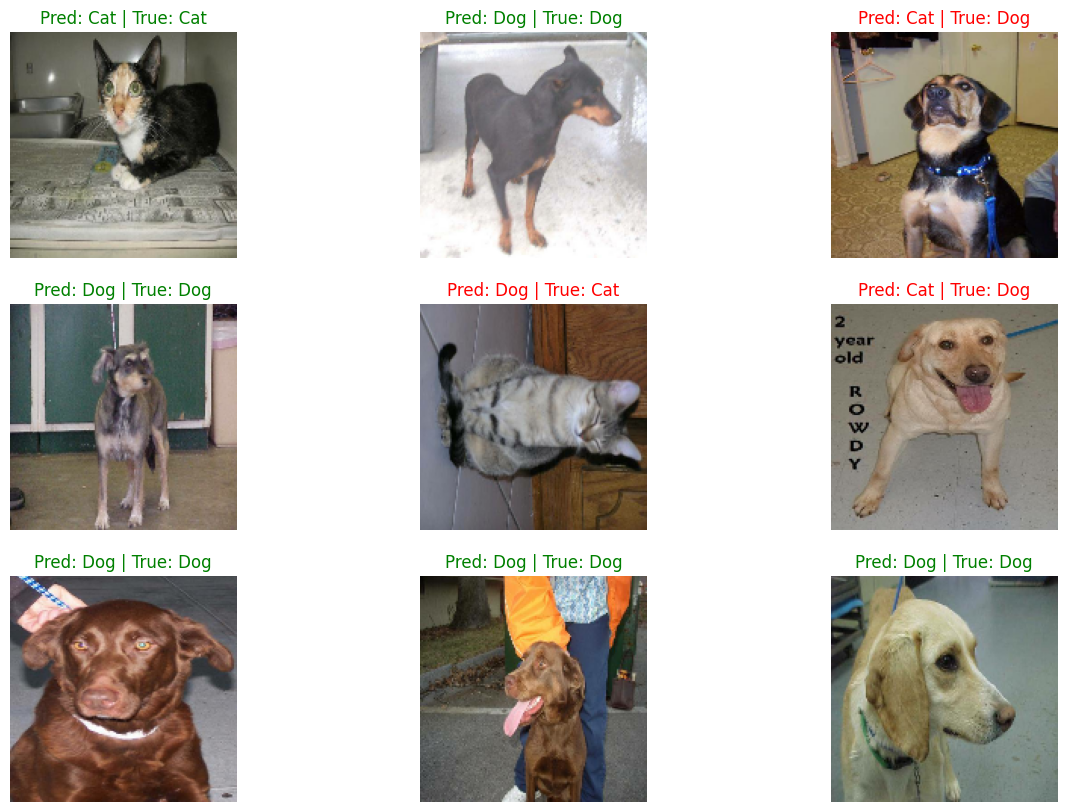

In [ ]:
import numpy as np
class_names = train_ds.class_names

# أخذ مجموعة صور من بيانات التحقق
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    plt.figure(figsize=(15, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_label = "Dog" if predictions[i] > 0.5 else "Cat"
        true_label = "Dog" if labels[i] == 1 else "Cat"
        color = "green" if pred_label == true_label else "red"
        plt.title(f"Pred: {pred_label} | True: {true_label}", color=color)
        plt.axis("off")

In [ ]:
model.save("cats_vs_dogs_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("cats_vs_dogs_model.h5")